<img src='https://github.com/Almeida-Paulo/Data-Science/blob/main/images/premier-league-0.png?raw=true' width="150" height="250">

# <center>Análise de dados da Premier League 1995-2021</center>

## Importação das bibliotecas necessárias

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregamento dos dados

In [204]:
data = pd.read_csv('datasets/PremierLeague_1997_2021.csv', encoding="ISO-8859-1")

In [216]:
data.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HC,AC,HF,AF,HY,AY,HR,AR,Total_Match_Goals
924,1995-96,Aston Villa,Man United,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
925,1995-96,Blackburn,QPR,1,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
926,1995-96,Chelsea,Everton,0,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
927,1995-96,Liverpool,Sheffield Weds,1,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
928,1995-96,Man City,Tottenham,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## Limpeza dos dados

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [207]:
(data.isna().sum() / data.shape[0])*100

Season       0.000000
DateTime     0.000000
HomeTeam     0.000000
AwayTeam     0.000000
FTHG         0.000000
FTAG         0.000000
FTR          0.000000
HTHG         8.314587
HTAG         8.314587
HTR          8.314587
Referee     25.411680
HS          25.411680
AS          25.411680
HST         25.411680
AST         25.411680
HC          25.411680
AC          25.411680
HF          25.411680
AF          25.411680
HY          25.411680
AY          25.411680
HR          25.411680
AR          25.411680
dtype: float64

In [208]:
data.drop(['DateTime','HTHG','HTAG','HTR','Referee','HST','AST'], axis=1, inplace=True)

In [209]:
data['Season'].unique()

array(['1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
      dtype=object)

In [211]:
#Essa temporada ainda não acabou, portando, deve ser excluída (20/05/2022), assim como as temporadas com 22 times
data[data['Season'] == '2021-22']

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HC,AC,HF,AF,HY,AY,HR,AR
10804,2021-22,Brentford,Arsenal,2,0,H,8.0,22.0,2.0,5.0,12.0,8.0,0.0,0.0,0.0,0.0
10805,2021-22,Man United,Leeds,5,1,H,16.0,10.0,5.0,4.0,11.0,9.0,1.0,2.0,0.0,0.0
10806,2021-22,Burnley,Brighton,1,2,A,14.0,14.0,7.0,6.0,10.0,7.0,2.0,1.0,0.0,0.0
10807,2021-22,Chelsea,Crystal Palace,3,0,H,13.0,4.0,5.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0
10808,2021-22,Everton,Southampton,3,1,H,14.0,6.0,6.0,8.0,13.0,15.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,Aston Villa,Tottenham,0,4,A,9.0,11.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,Brentford,West Ham,2,0,H,15.0,5.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,Leicester,Crystal Palace,2,1,H,12.0,11.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,Norwich,Burnley,2,0,H,17.0,18.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [212]:
#Filtrar apenas as temporadas desejadas
data = data.loc[(data['Season'] != '1993-94') & (data['Season'] != '1994-95') & (data['Season'] != '2021-22')]

## Visualização dos Dados

In [213]:
# gols por temporada
data.loc[ : , 'Total_Match_Goals'] = data['FTHG'] + data['FTAG']

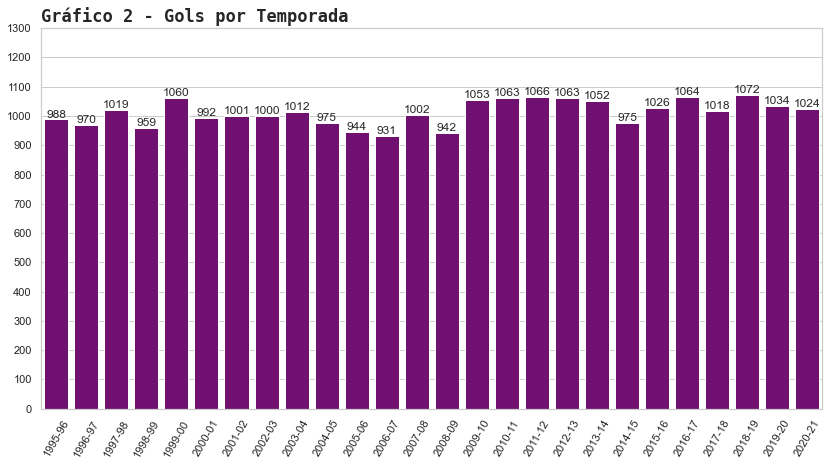

In [225]:
goals_season = data[['Total_Match_Goals', 'Season']].groupby('Season').sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.barplot(x='Season', y='Total_Match_Goals', data=goals_season, ax=ax, color='purple')
ax.bar_label(ax.containers[0])
plt.title('Gráfico 2 - Gols por Temporada', size=17, loc='left', family='monospace', weight=800)
plt.xticks(rotation=60)
plt.yticks(np.arange(0, 1301, step=100))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [215]:
data.columns

Index(['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS',
       'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Total_Match_Goals'],
      dtype='object')

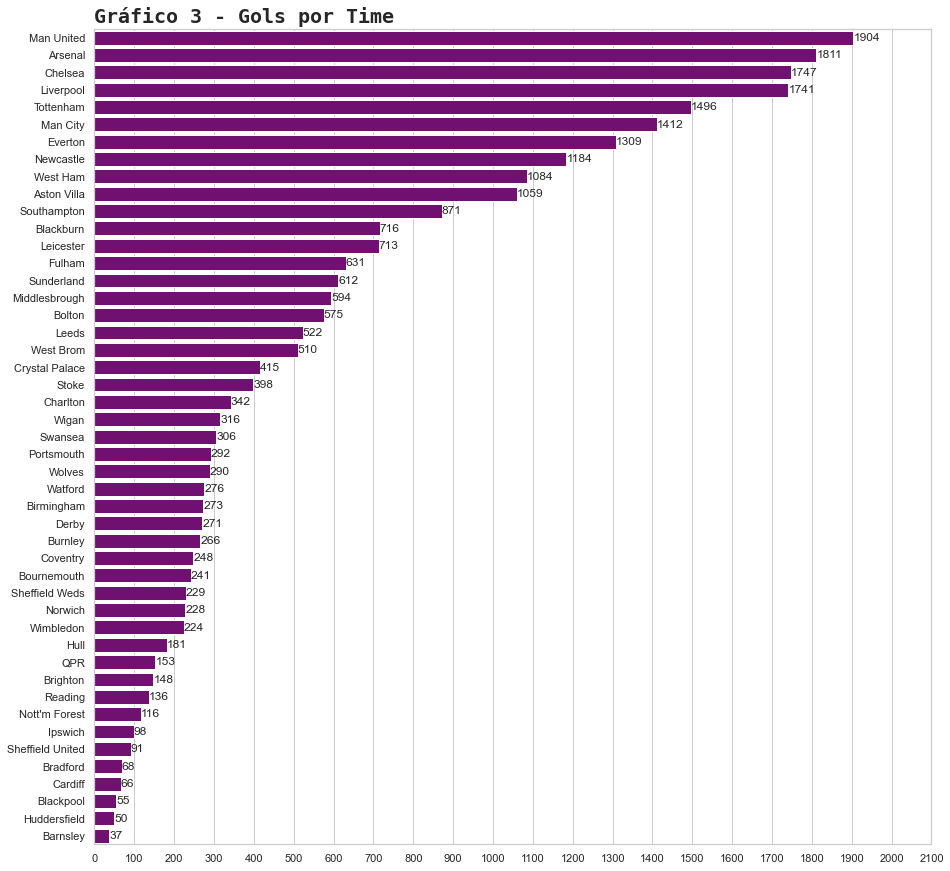

In [220]:
tot_g = (data.groupby('HomeTeam')['FTHG'].sum() + data.groupby('AwayTeam')['FTAG'].sum()).reset_index()
tot_g.rename(columns = {0:'Season_goals'}, inplace=True)
tot_g = tot_g.sort_values(by='Season_goals',ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x='Season_goals', y='HomeTeam', data=tot_g, ax=ax, color='purple')
ax.bar_label(ax.containers[0])
plt.title('Gráfico 3 - Gols por Time', size=20, loc='left', family='monospace', weight=800)
plt.xticks(np.arange(0, 2101, step=100))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

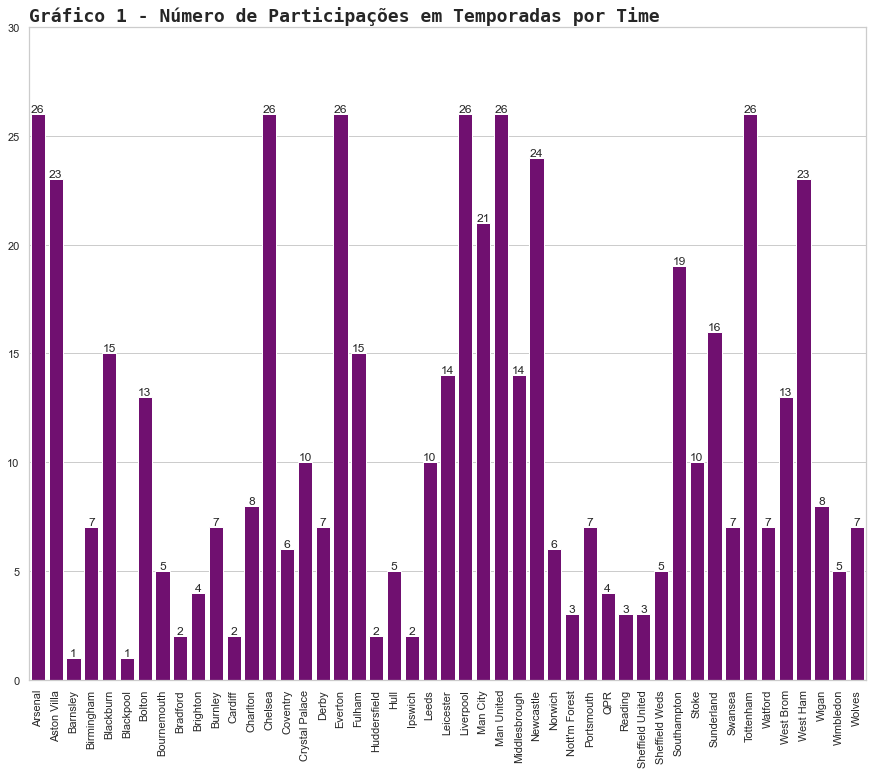

In [223]:
seasons_played = data.groupby('HomeTeam')['Season'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(15, 12))
sns.set_theme(style="whitegrid")
sns.barplot(x='HomeTeam', y='Season', data=seasons_played, ax=ax, color='purple')
ax.bar_label(ax.containers[0])
plt.title('Gráfico 1 - Número de Participações em Temporadas por Time', size=18, loc='left', family='monospace', weight=800)
plt.xticks(rotation= 90)
plt.yticks(np.arange(0, 31, step=5))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Tabela de Pontos

#### Estatísticas em casa

In [126]:
# Total de jogos, vitórias, derrotas e empates em casa
home_ = data.groupby(['Season','HomeTeam'])['FTR'].count().rename("HG")
hwin = data[data['FTR'] == 'H'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HW")
hloss = data[data['FTR'] == 'A'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HL")
hdraw = data[data['FTR'] == 'D'].groupby(['Season', 'HomeTeam'])['FTR'].count().rename("HD")
home_games = pd.concat([home_, hwin, hloss, hdraw], axis=1).reset_index()
home_games.fillna(0, inplace=True)
home_games[['HG', 'HL', 'HD', 'HW']] = home_games[['HG', 'HL', 'HD', 'HW']].astype(int)

# Total de gols feitos e sofridos em casa
home_score = data.groupby(['Season', 'HomeTeam'])[['FTAG', 'FTHG']].sum().astype(int).reset_index()
home_score.rename(columns={'FTHG':'HgoalsFor', 'FTAG':'HgoalsAgainst'}, inplace=True)

home_df = pd.merge(left=home_games, right=home_score, on=['Season','HomeTeam'], how='left')

#### Estatísticas fora de casa

In [137]:
# Total de jogos, vitórias, derrotas e empates fora de casa
away_ = data.groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AG")
awin = data[data['FTR'] == 'A'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AW")
aloss = data[data['FTR'] == 'H'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AL")
adraw = data[data['FTR'] == 'D'].groupby(['Season', 'AwayTeam'])['FTR'].count().rename("AD")
away_games = pd.concat([away_, awin, aloss, adraw], axis=1).reset_index()
away_games.fillna(0, inplace=True)
away_games[['AG', 'AL', 'AD', 'AW']] = away_games[['AG', 'AL', 'AD', 'AW']].astype(int)

# Total de gols feitos e sofridos em casa
away_score = data.groupby(['Season', 'AwayTeam'])[['FTAG', 'FTHG']].sum().astype(int).reset_index()
away_score.rename(columns={'FTHG':'AgoalsAgainst', 'FTAG':'AgoalsFor'}, inplace=True)

away_df = pd.merge(left=away_games, right=away_score, on=['Season','AwayTeam'], how='left')

#### Montando a tabela

In [178]:
# Tabela de pontos
pt_table = pd.merge(left=home_df, right=away_df, left_on=['Season','HomeTeam'], right_on=['Season', 'AwayTeam']).drop(['AwayTeam'], axis=1)
pt_table.rename(columns={'HomeTeam':'Team'}, inplace=True)
pt_table['Total Games'] = pt_table['HG'] + pt_table['AG']
pt_table['Total Wins'] = pt_table['HW'] + pt_table['AW']
pt_table['Total Loss'] = pt_table['HL'] + pt_table['AL']
pt_table['Total Draw'] = pt_table['HD'] + pt_table['AD']
pt_table['GF'] = pt_table['HgoalsFor'] + pt_table['AgoalsFor']
pt_table['GA'] = pt_table['HgoalsAgainst'] + pt_table['AgoalsAgainst']
pt_table['GD'] = pt_table['GF'] - pt_table['GA']
pt_table['TotalPoints'] = 3*pt_table['Total Wins'] + pt_table['Total Draw']

# Ranqueando os times
pt_table['Rank'] = pt_table.groupby('Season')['TotalPoints'].rank(method='min', ascending=False)

## Caso os pontos sejam iguais, usa-se o saldo de gols
pt_table['Dis'] = pt_table.groupby(['Season', 'Rank'])['GD'].rank(method='first', ascending=False)

pt_table['Rank'] = (np.where((pt_table['Dis'] > 1), (pt_table['Rank'] + pt_table['Dis'] - 1), pt_table['Rank'])).astype(int)
pt_table.drop('Dis', axis=1, inplace=True)


# Amostra
pt_table[pt_table['Season'] == '2020-21'].sort_values(by='Rank')[['Season', 'Team', 'Total Games', 'Total Wins', 'Total Loss', 'Total Draw', 'GF', 'GA', 'GD', 'TotalPoints', 'Rank']]

,Season,Team,Total Games,Total Wins,Total Loss,Total Draw,GF,GA,GD,TotalPoints,Rank
511,2020-21,Man City,38,27,6,5,83,32,51,86,1
512,2020-21,Man United,38,21,6,11,73,44,29,74,2
510,2020-21,Liverpool,38,20,9,9,68,42,26,69,3
504,2020-21,Chelsea,38,19,9,10,58,36,22,67,4
509,2020-21,Leicester,38,20,12,6,68,50,18,66,5
518,2020-21,West Ham,38,19,11,8,62,47,15,65,6
516,2020-21,Tottenham,38,18,12,8,68,45,23,62,7
500,2020-21,Arsenal,38,18,13,7,55,39,16,61,8
508,2020-21,Leeds,38,18,15,5,62,54,8,59,9
506,2020-21,Everton,38,17,13,8,47,48,-1,59,10


### Quantidade de Pontos Alcançada pelo Campeão de cada Temporada

In [162]:
## Selecionando o Campeão
champ = pt_table[(pt_table['Rank'] == 1)]
champ.set_index('Season', drop=True, inplace=True)
champ = champ.reset_index()

[Text(0, 0, '1995-96'),
 Text(1, 0, '1996-97'),
 Text(2, 0, '1997-98'),
 Text(3, 0, '1998-99'),
 Text(4, 0, '1999-00'),
 Text(5, 0, '2000-01'),
 Text(6, 0, '2001-02'),
 Text(7, 0, '2002-03'),
 Text(8, 0, '2003-04'),
 Text(9, 0, '2004-05'),
 Text(10, 0, '2005-06'),
 Text(11, 0, '2006-07'),
 Text(12, 0, '2007-08'),
 Text(13, 0, '2008-09'),
 Text(14, 0, '2009-10'),
 Text(15, 0, '2010-11'),
 Text(16, 0, '2011-12'),
 Text(17, 0, '2012-13'),
 Text(18, 0, '2013-14'),
 Text(19, 0, '2014-15'),
 Text(20, 0, '2015-16'),
 Text(21, 0, '2016-17'),
 Text(22, 0, '2017-18'),
 Text(23, 0, '2018-19'),
 Text(24, 0, '2019-20'),
 Text(25, 0, '2020-21')]

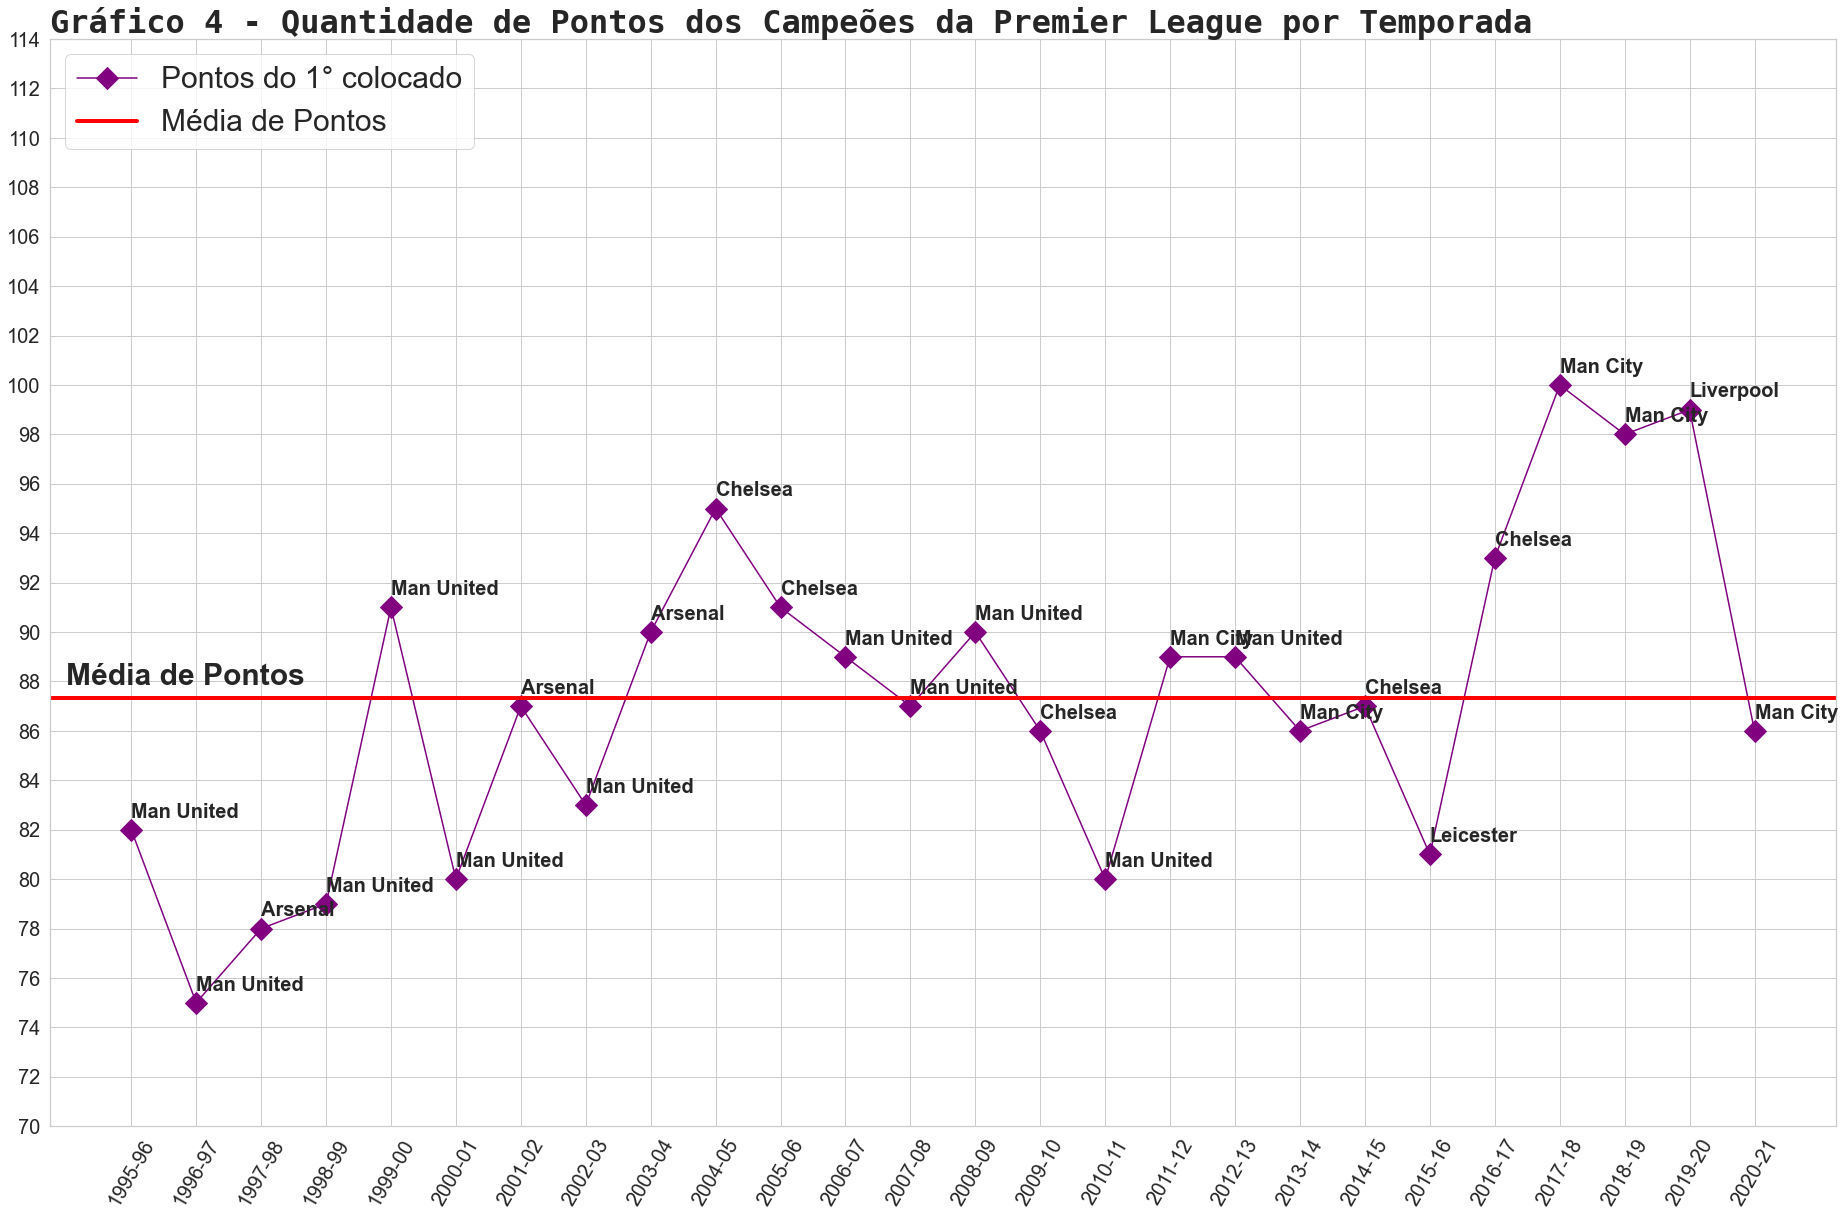

In [231]:
ax = champ.plot(kind='line', color='purple', y='TotalPoints', grid=True, figsize=(32, 20), label='Pontos do 1° colocado', linestyle='-', marker='D', markevery=1, markersize=15, fillstyle='full', markerfacecolor='purple')
plt.axhline(y=champ['TotalPoints'].mean(), color='red', label='Média de Pontos', linewidth=4)
plt.yticks(np.arange(70, 115, step=2), fontsize=20)
plt.annotate('Média de Pontos', (-1, champ['TotalPoints'].mean() + 0.5), fontsize=30, fontweight='bold')
a = 0
for index, row in champ.iterrows():
    b = row.TotalPoints
    plt.annotate(row.Team, (a, b+.5), fontsize=20, fontweight='bold')
    a = a+1
plt.xlabel(None)
plt.ylabel(None)
plt.title('Gráfico 4 - Quantidade de Pontos dos Campeões da Premier League por Temporada', size=32, loc='left', family='monospace', weight=800)
plt.legend(loc=2, fontsize=30)
plt.xticks(champ.index, rotation=60, fontsize=20)
ax.set_xticklabels(champ['Season'])

In [192]:
major_teams = ['Arsenal', 'Chelsea', 'Everton', 'Liverpool', 'Man City', 'Man United', 'Tottenham']
seasons_performance = pt_table[pt_table['Team'].isin(major_teams)][['Season', 'Team', 'TotalPoints']]

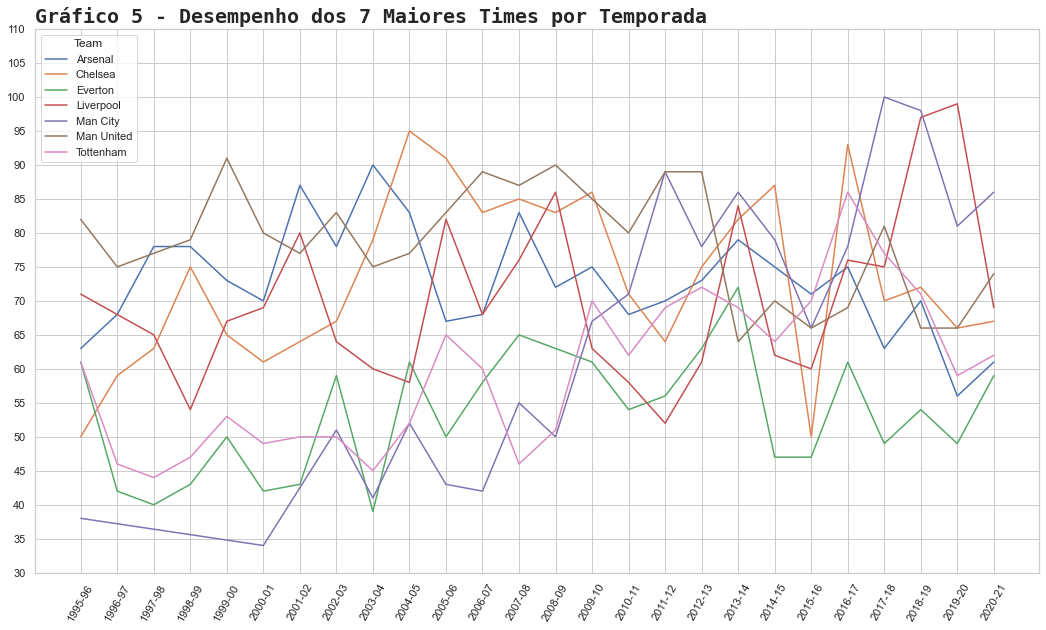

In [238]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=seasons_performance, x="Season", y="TotalPoints", hue="Team")
plt.title('Gráfico 5 - Desempenho dos 7 Maiores Times por Temporada', size=20, loc='left', family='monospace', weight=800)
plt.xticks(rotation= 60)
plt.yticks(np.arange(30, 115, step=5))
plt.xlabel(None)
plt.ylabel(None)
plt.show()
